## Lab 7 Part I: Plotting Skew-<i>T</i>, ln-<i>p</i> diagrams
<br /><br />
In this tutorial, we are going to create Skew-<i>T</i>, ln-<i>p</i> diagrams at specific locations using observation data to aid in inferring horizontal temperature advection (from thermal-wind principles). Luckily, MetPy has functionality to make plotting Skew-<i>T</i>, ln-<i>p</i> diagrams easy rather than us having to build these diagrams (particularly their skewed axes) from scratch.
<br />
### Module Documentation

1. Matplotlib Pyplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
2. Siphon Wyoming Upper Air: https://unidata.github.io/siphon/latest/api/simplewebservice.html#siphon.simplewebservice.wyoming.WyomingUpperAir.request_data
3. MetPy Skew T: https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html




If you have any questions about the code below, feel free to reach out to me at mpvossen@uwm.edu. I am always willing to further explain the code. <br /> <br />

---

<br />
1. As usual, we start by importing the modules we need for our Python code.

In [1]:
#from python's date and time module (from datetime) import the ability to work with date and times (import datetime)
from datetime import datetime

#using the module siphon and its ability to retrieve files from online (.simplewebservice) specifically for the University of Wyoming (.wyoming), 
#import the ability to download from the University of Wyoming's upper-air data archive
from siphon.simplewebservice.wyoming import WyomingUpperAir

#from metpy's plotting abilities import the SkewT plotting class
from metpy.plots import SkewT

#import the plotting abilities of the module matplotlib (import matplotlib.pyplot) and save it to plt
import matplotlib.pyplot as plt

#from the metpy's units feature (metpy.units) import the ability to assign and convert units (units)
from metpy.units import units

<br /><br />
2. Like we have done in past labs, we first need to create variables to define our desired data.  For rawinsonde observations, we need two variables: the time of the observations (in datetime format) and the second is the observation site (as a string).  In the code block below, define the time variable as sounding_date and set it to 0000 UTC September 9, 2014 and define the site variable as station and set it to DVN.

In [2]:
valid_time=datetime(2014,9,9,0)
station="DVN"

<br /><br />
3. In the code section below, we take the time and station variables you defined above and pass them into the siphon WyomingUpperAir.request_data function to retrieve the observation for the desired time and location.

In [3]:
upper_air_data = WyomingUpperAir.request_data(valid_time, station)

upper_air_data

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,987.0,229,22.8,14.8,170.0,8.0,-1.389185,7.878462,DVN,74455,2014-09-09,41.61,-90.58,229.0,31.82
1,980.0,291,23.0,14.0,171.0,10.0,-1.564345,9.876883,DVN,74455,2014-09-09,41.61,-90.58,229.0,31.82
2,944.5,610,20.1,13.0,175.0,23.0,-2.004582,22.912478,DVN,74455,2014-09-09,41.61,-90.58,229.0,31.82
3,925.0,791,18.4,12.4,185.0,25.0,2.178894,24.904867,DVN,74455,2014-09-09,41.61,-90.58,229.0,31.82
4,911.8,914,17.4,11.9,195.0,24.0,6.211657,23.182220,DVN,74455,2014-09-09,41.61,-90.58,229.0,31.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,9.5,31685,-42.7,-78.7,353.0,3.0,0.365608,-2.977638,DVN,74455,2014-09-09,41.61,-90.58,229.0,31.82
109,9.1,32004,-43.1,-79.1,0.0,0.0,-0.000000,-0.000000,DVN,74455,2014-09-09,41.61,-90.58,229.0,31.82
110,8.7,32309,-43.4,-79.4,60.0,16.0,-13.856406,-8.000000,DVN,74455,2014-09-09,41.61,-90.58,229.0,31.82
111,7.9,32918,-44.1,-80.1,105.0,3.0,-2.897777,0.776457,DVN,74455,2014-09-09,41.61,-90.58,229.0,31.82


<br /><br />
4. We are now ready to plot.  Like in previous labs, we will once again use a function for our plot since we will be plotting three different Skew-<i>T</i>, ln-<i>p</i> diagrams.  Watch out in the comments for areas you need to fill in.

In [4]:
"""
Below a function is defined to plot a Skew-T, ln-p diagram using observation data.  This plot contains
temperature and dewpoint traces.


INPUT:
    data : PANDAS DATAFRAME
        The rawinsonde observation data
    station : STRING
        The rawinsonde station that the data is for.
    valid_time : DATETIME
        The time of the rawinsonde observation.
"""


def plot_skewT(data, station, valid_time):
    """
    For the Skew-T, ln-p plots, MetPy requires all inputs into the plot to have units.
    For the variables below add units to the variable using MetPy's units capabilities.
    """
    p = data['pressure'].values * units.hPa
    T = data['temperature'].values * units.degC
    Td = data['dewpoint'].values * units.degC
    u = data['u_wind'].values * units.kt 
    v = data['v_wind'].values * units.kt
    
    """
    Define a matplotlib figure that is 900px x 900px with a resolution of 300 dots per inch and save it to the variable fig.
    """
    fig = plt.figure(figsize=(9,9),dpi=300)
    
    
    """
    Here I initialize our Skew-T, ln-p diagram similarly to how we defined our axes in previous labs.
    
    The first argument is your figure variable so MetPy knows where to create the Skew-T, ln-p axes.
    The second argument is how to rotate your temperature axis.  The standard Skew-T, ln-p diagram uses a 45° skew.
    """
    skew = SkewT(fig, rotation=45)
    
    
    """
    Like in previous labs, we want to limit the plot's extent.  However, in the case of Skew-T, ln-p diagrams,
    limiting the plot's extent is handled different from before.  For the Skew-T, ln-p diagram, we must have
    separate statements for the x and y axes with the minimum value in the first argument and the maximum value in the second
    argument. In the two lines of code below I set the extent of the plot for you.
    """
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-40, 40)
    
    
    """
    We are ready to now start drawing our temperature and dewpoint traces.  In the two lines below I have 
    blank plot statements for you to fill out: one for the temperature trace and the other for the 
    dewpoint trace.
    
    The Skew-T, ln-p plotting function requires 3 arguments in this order:
    First is the height variable.  In most cases (including this case), this is pressure.
    Second is the variable (e.g., temperature or dewpoint) you wish to plot.
    Third is the color of the line you are plotting.  This uses the standard matplotlib colors.
    
    You can add more of the standard matplotlib styling arguments such as linewidth or linestyle by adding additional arguments.
    """
    skew.plot(p,T,color='r')
    skew.plot(p,Td,color='g')
    
    
    """
    We need to thin out the wind data since there are too many observations to legibly plot.
    In the code below, set up a slice for the wind barbs (like in Labs 5 and 6) and have it skip
    every 3 observations.
    """
    wind_slice = slice(None, None, 3)
    
    
    """
    In the line below, I plot the thinned wind barbs.  The wind barb arguments are set up similar to the plot arguments.
    
    The first argument is your vertical level, typically pressure.
    The second and third arguments are your u- and v-wind components, respectively.
    The fourth argument is the barbs' length.  Larger values result in longer barbs.
    The final argument is the x location relative to the skew-T, ln-p diagram's axis (where 1 is the far right edge).
    Higher values will move your wind barbs to the right and smaller values will move your wind barbs to the left.
    
    You can also add more of the standard matplotlib wind barb styling arguments by adding additional arguments.
    """
    skew.plot_barbs(p[wind_slice], u[wind_slice], v[wind_slice], length=5, xloc=1.05)


    """
    Since we are not plotting geographic data, we need to provide labels for the x and y axes.
    In the two lines below I label these axes appropriately.
    """
    skew.ax.set_xlabel("Temperature ($\degree$C)")
    skew.ax.set_ylabel("Pressure (hPa)")
    
    
    """
    Finally, like all plots we have created this semester, this plot needs a title.  Create an appropriate title for this plot.
    """
    plt.title(f"Valid:{valid_time:%m/%d/%Y %H%M} UTC",size=8,loc="right")
    plt.title(f"Station: {station}",size=8,loc="left")
    



<br /><br />
5. Call the plotting function you just created.

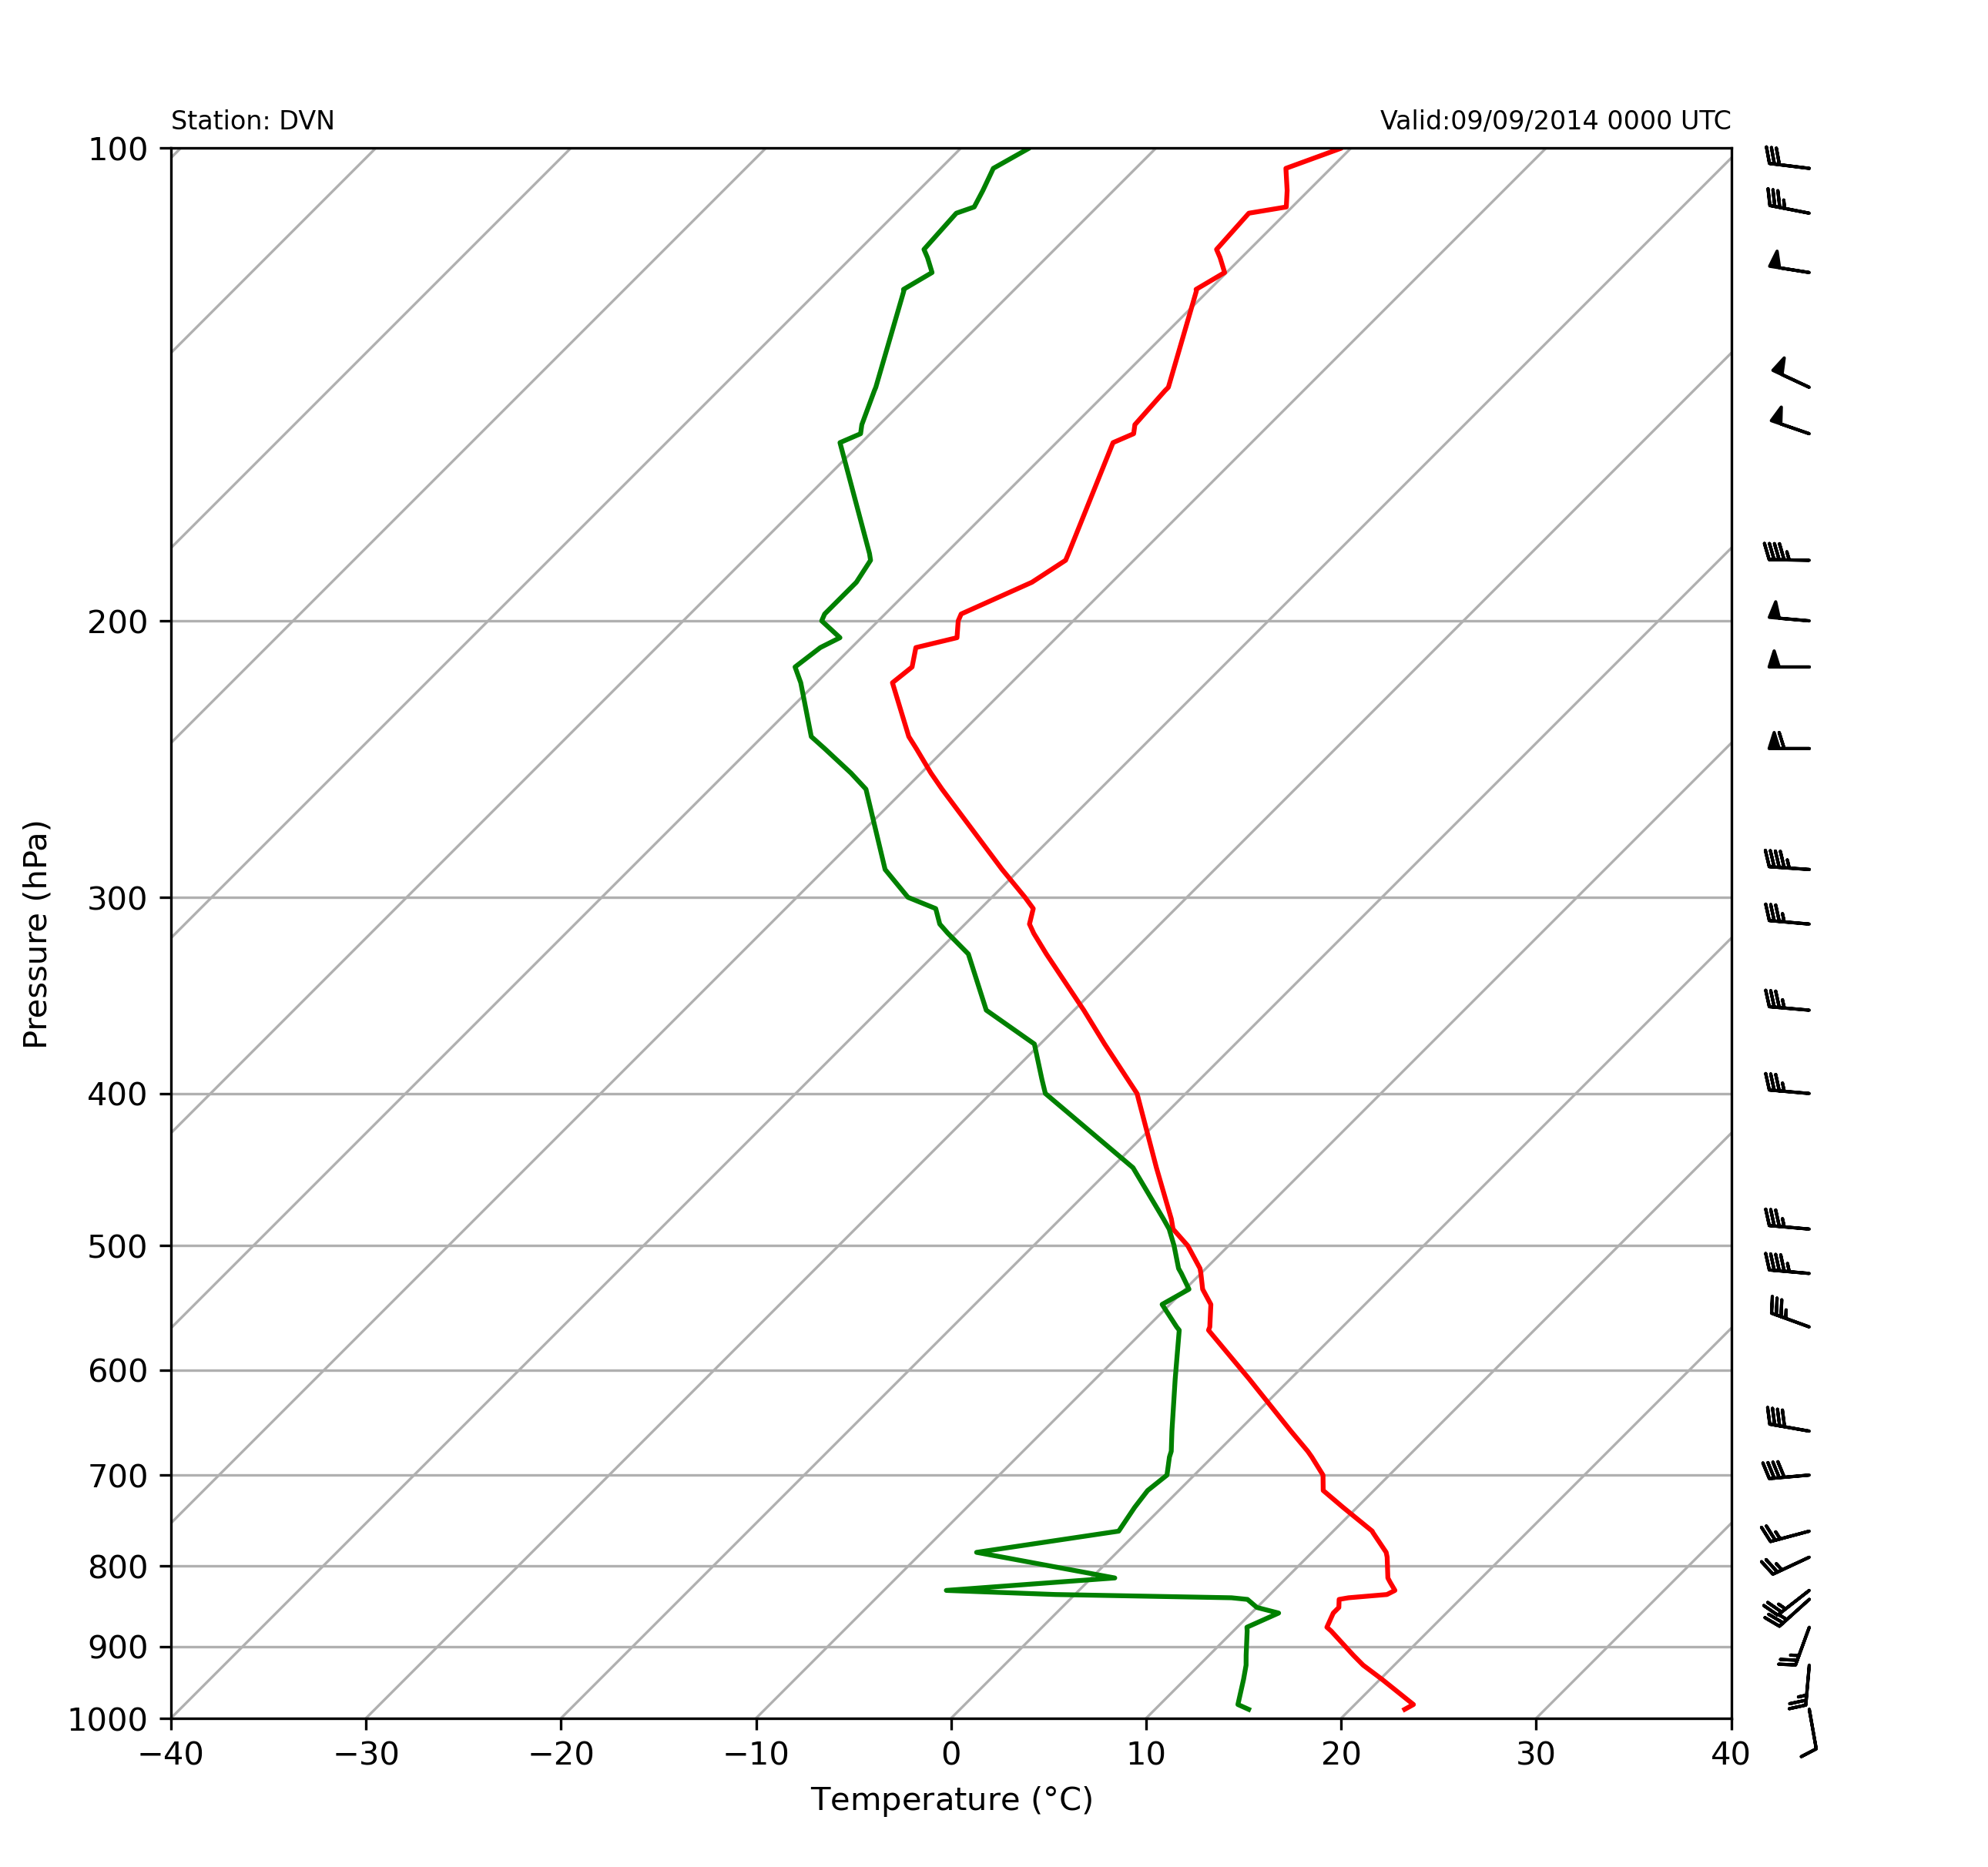

In [5]:
plot_skewT(upper_air_data, station, valid_time)

<br /><br />
6. Re-run your plotting function for site OAX at 0000 UTC on December 15, 2008.

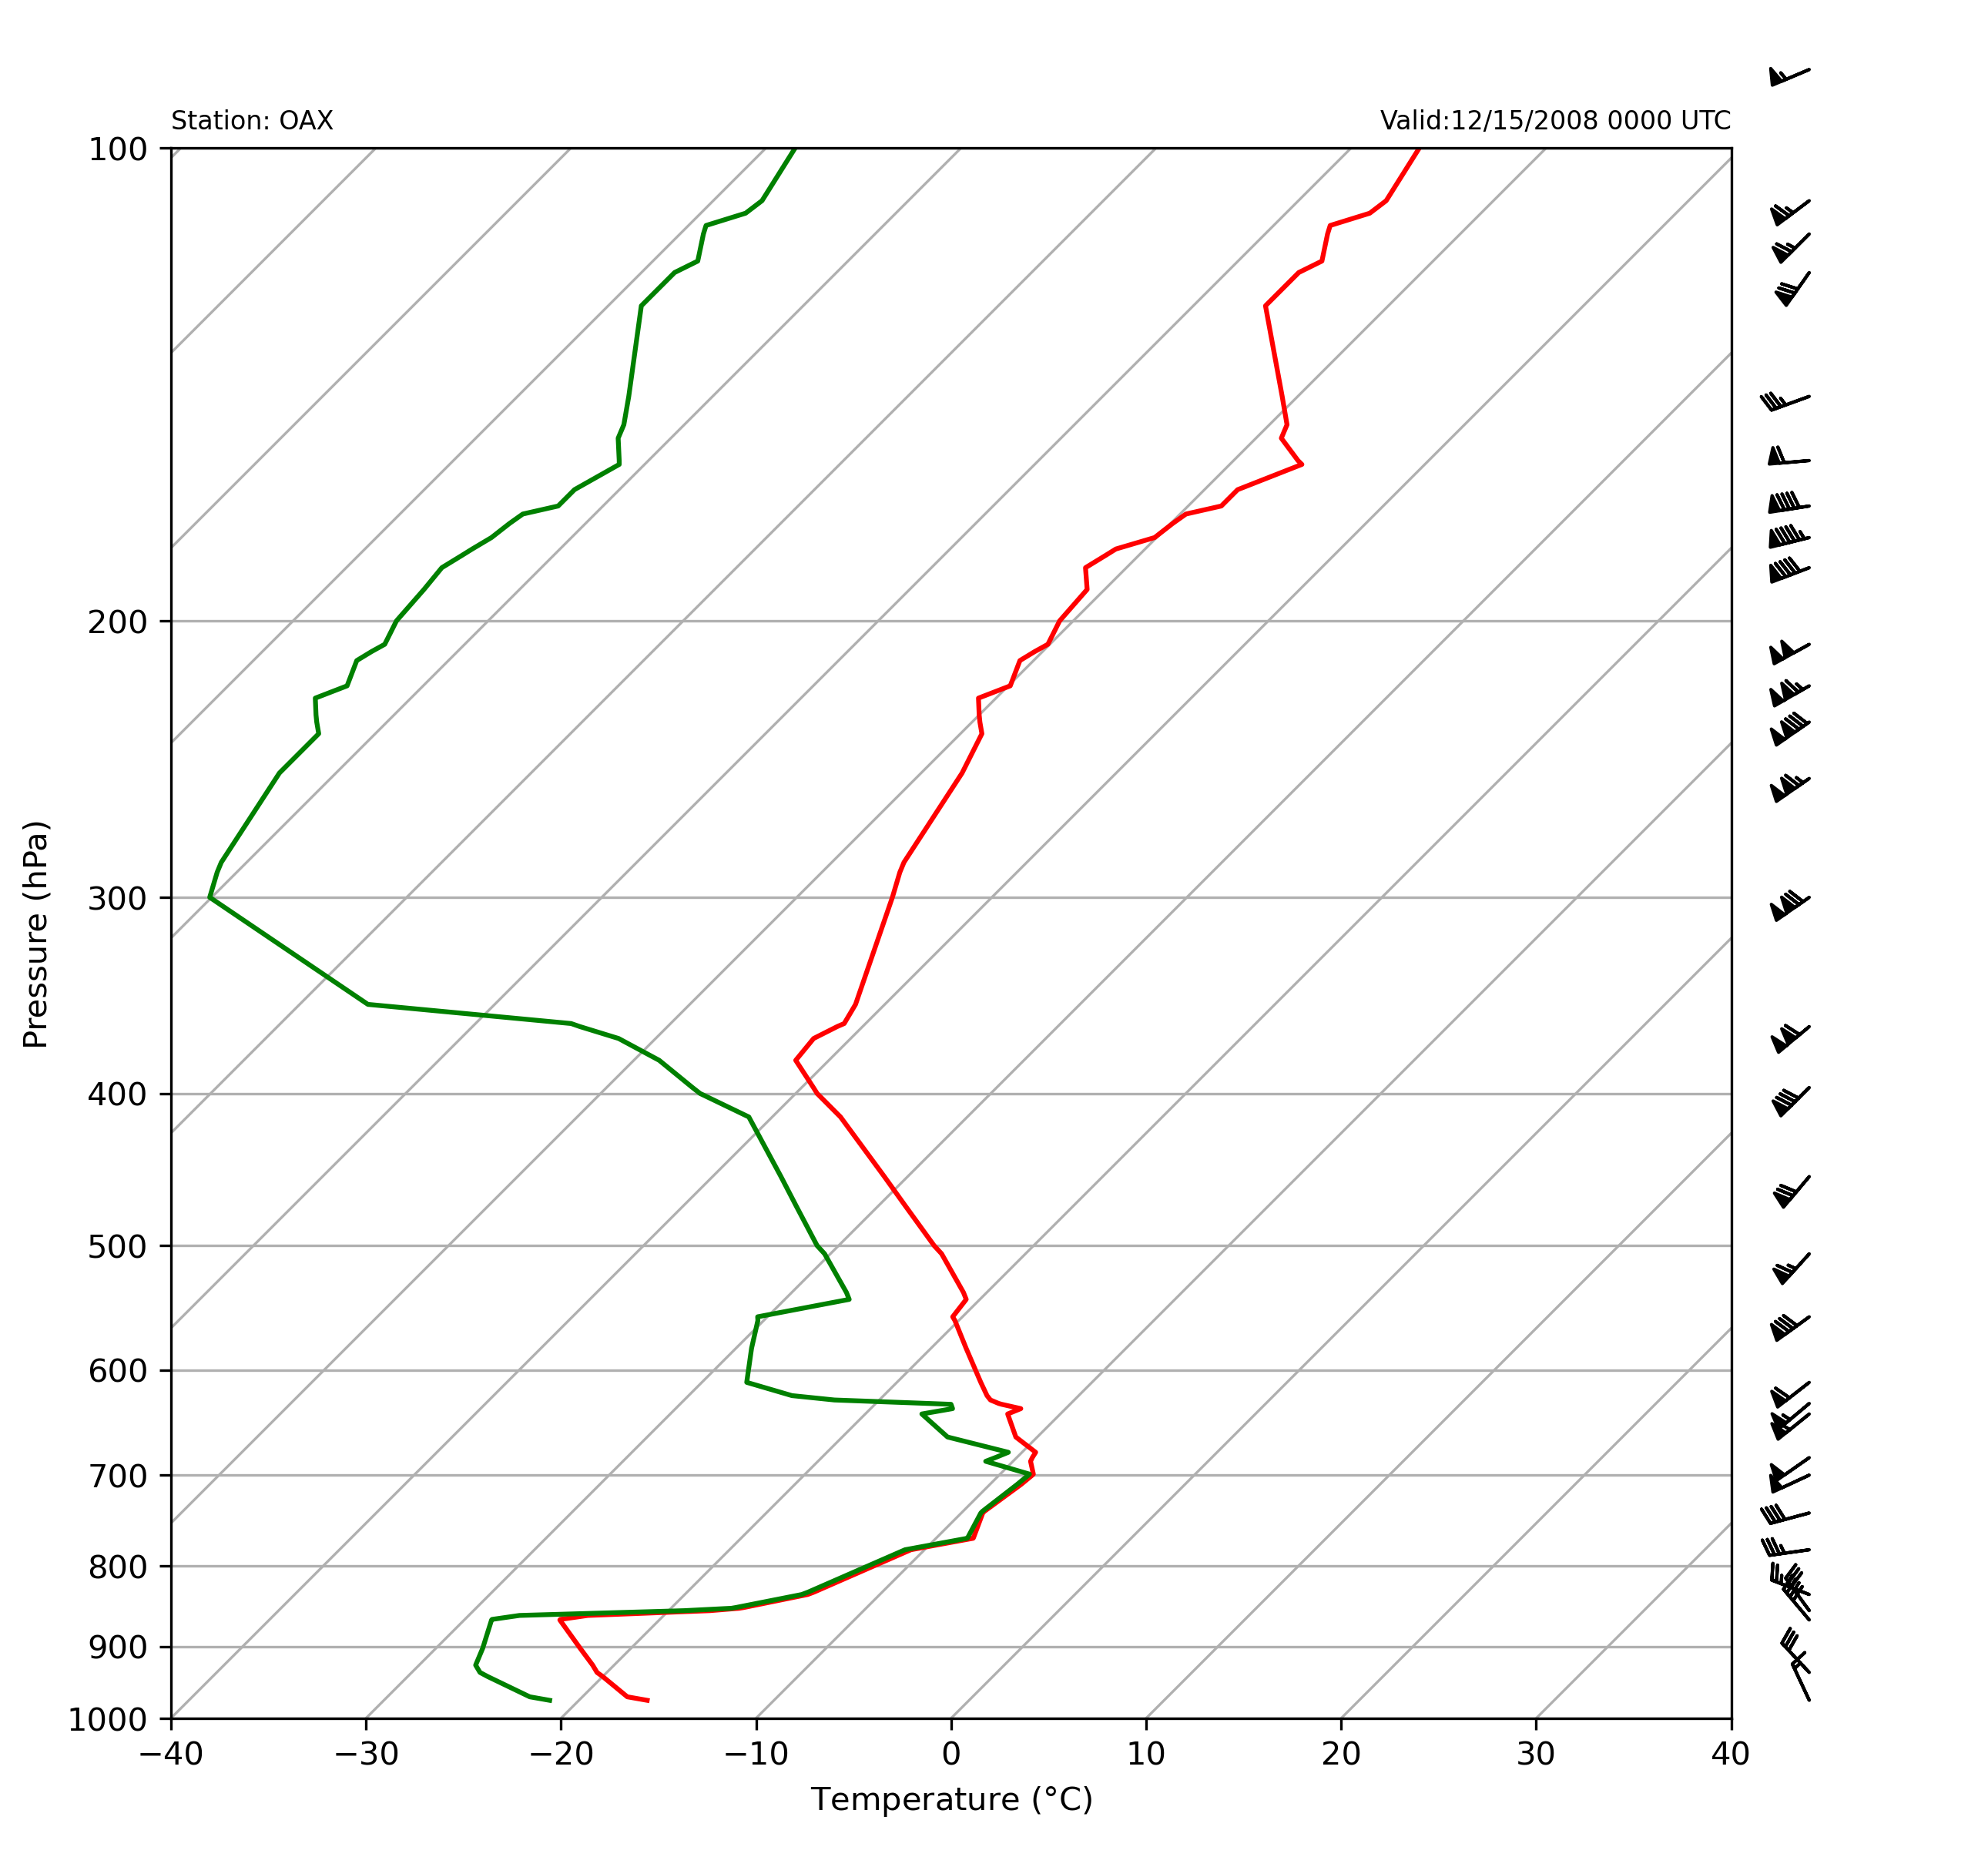

In [6]:
valid_time=datetime(2008,12,15,0)
station="OAX"
upper_air_data = WyomingUpperAir.request_data(valid_time, station)

plot_skewT(upper_air_data, station, valid_time)

<br /><br />
7. Re-run your plotting function for the site RAP at 0000 UTC on February 19, 2022.

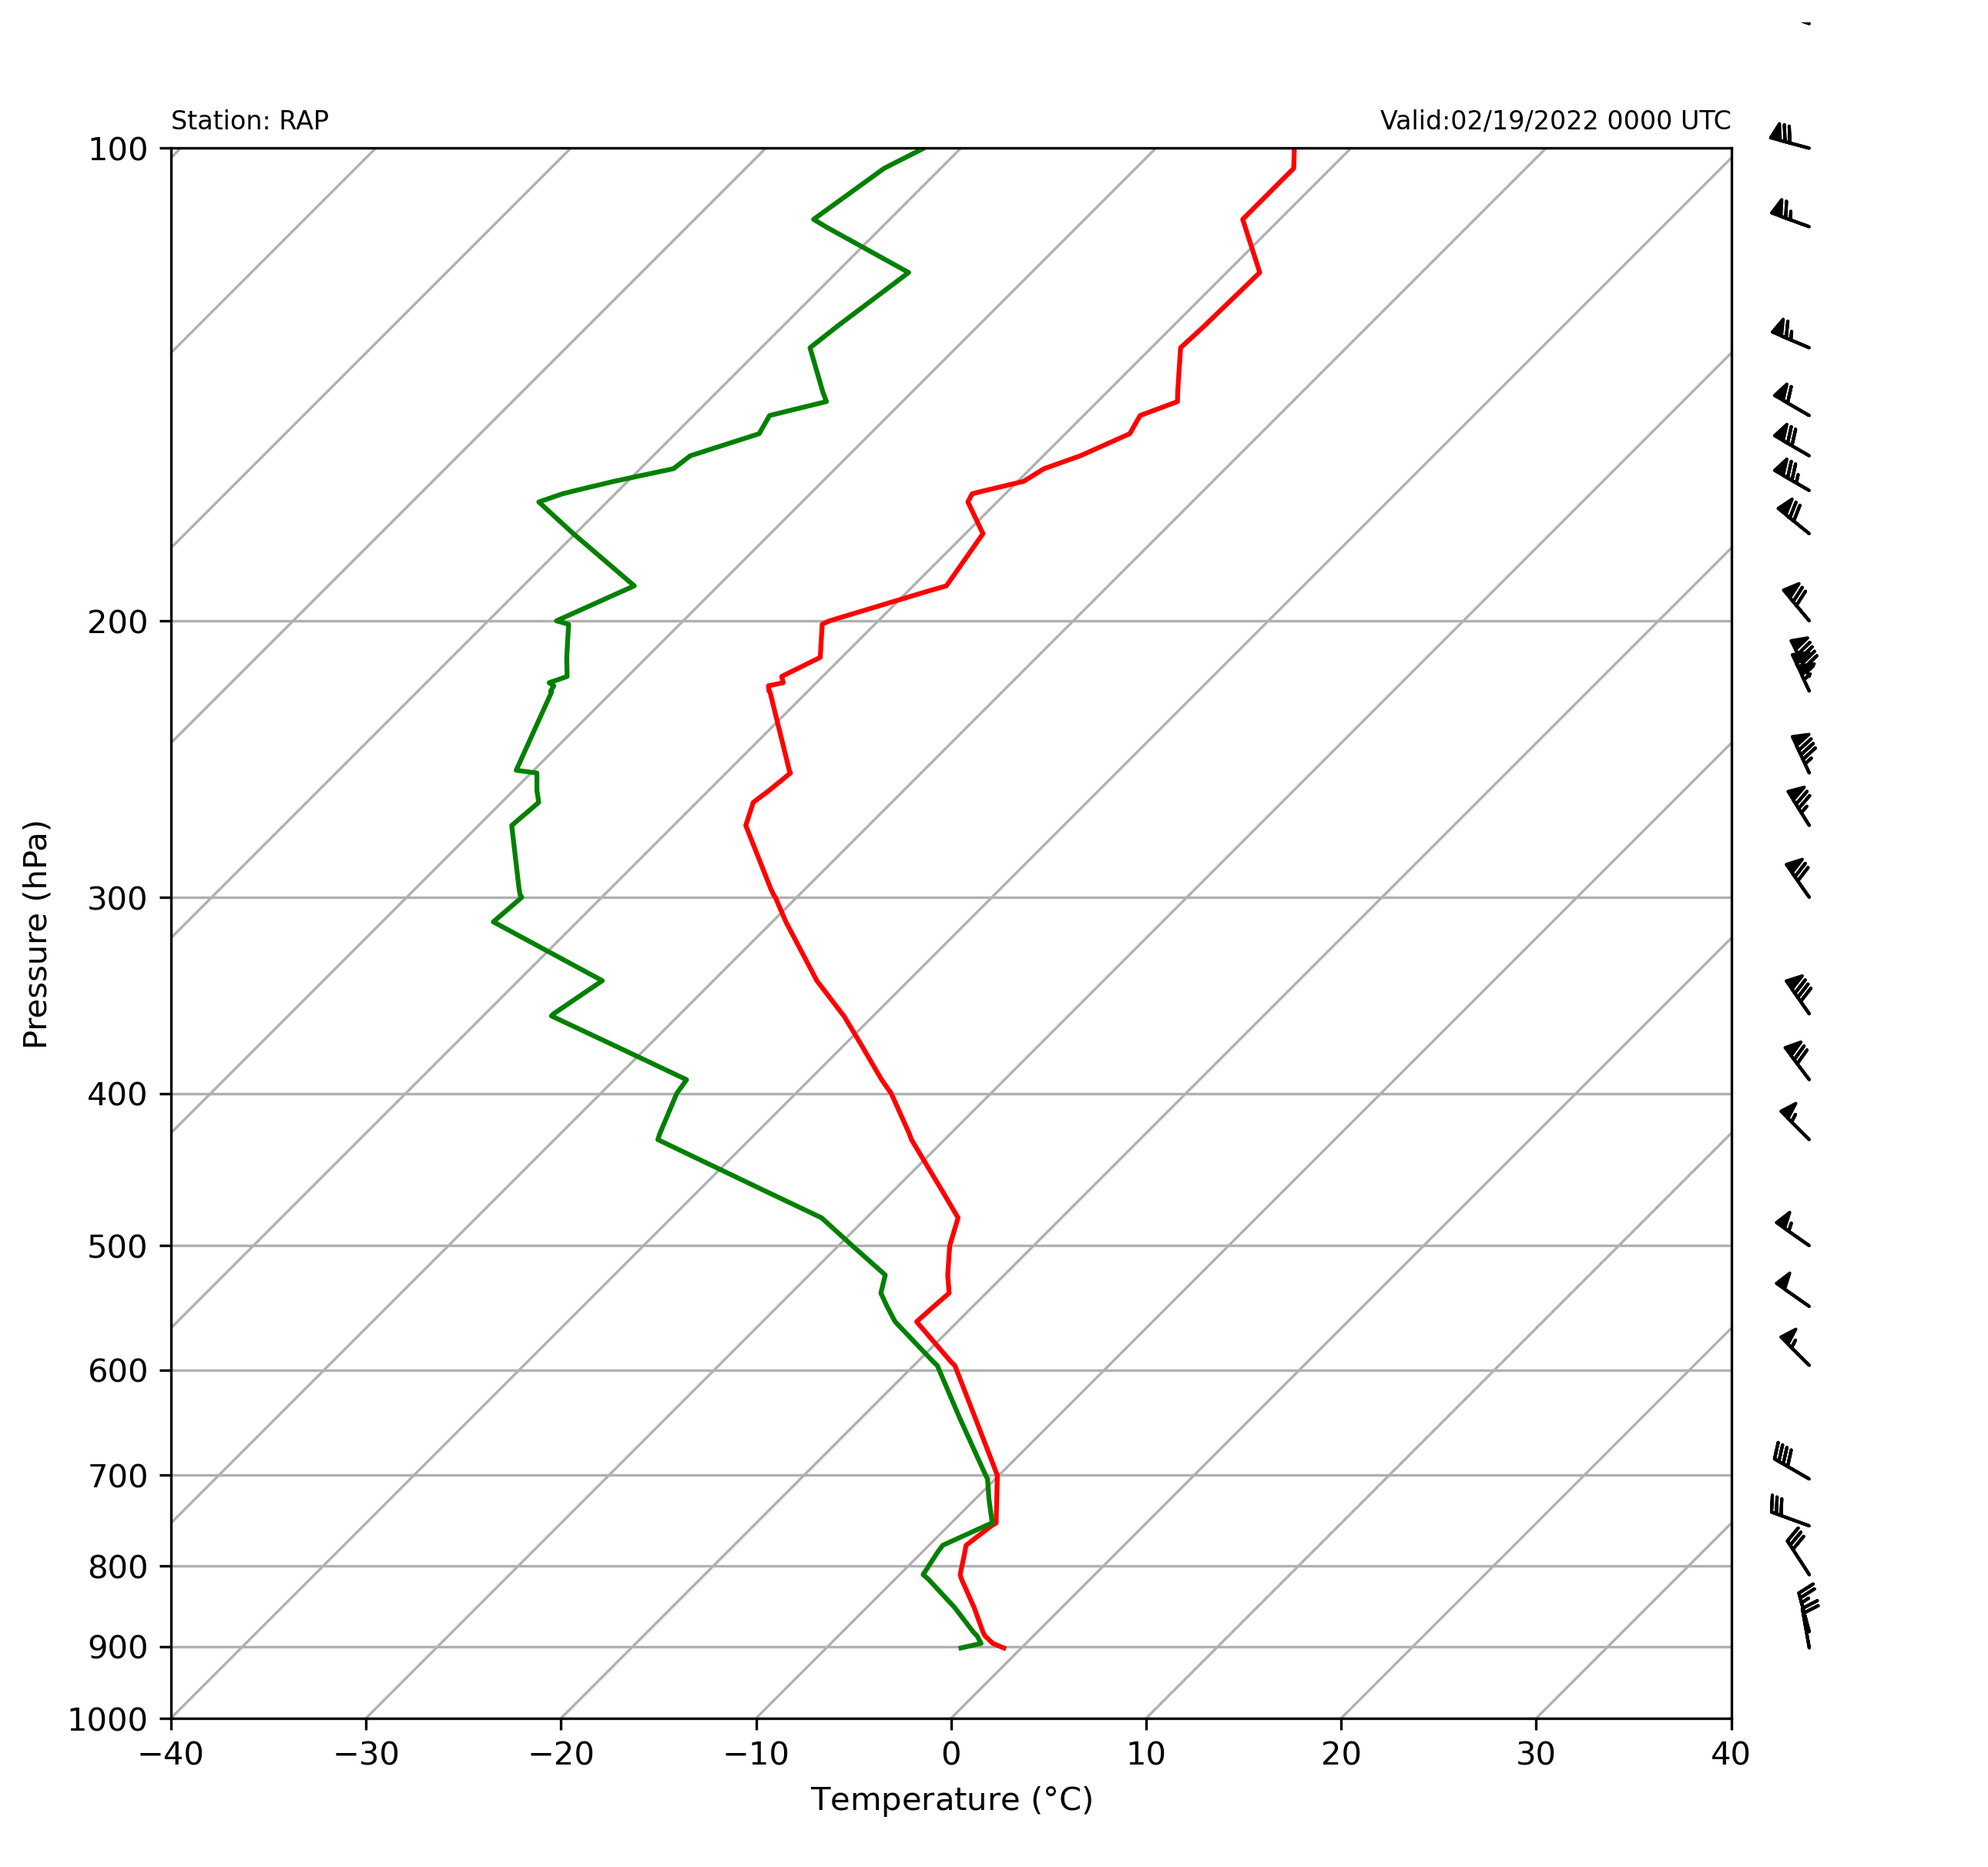

In [7]:
valid_time=datetime(2022,2,19,0)
station="RAP"
upper_air_data = WyomingUpperAir.request_data(valid_time, station)

plot_skewT(upper_air_data, station, valid_time)

### You have now completed Part I of the Python portion of the lab.  Be sure to submit the fully rendered Jupyter Notebook on GitHub when you are finished.